**Тема Работы: Обработка пропущенных**
----

Автор: Махмутов Ринат

Группа: 09-813

Вариант: 8


In [ ]:
# # установим нужные пакеты 
# install.packages("dplyr")
# install.packages("caret")
# install.packages("psych")
# install.packages("ggplot2")

Считаем наши данные, пропущенные ячейки заменим на NA, запищем в переменную dt

In [1]:
dt <- read.csv("Вар8.csv", header=T, na.strings=c("","NA"), sep=';')

Проверим, правильно ли записались нащи данные 

In [2]:
head(dt)

sirname,age,gender,WBC,RBC,HGB,HCT,PLT,LYM,MCV,Type
Allen,38,female,"8,6","4,3",111,"0,25",256,NA,73,Anemia
Arnold,29,male,"7,3","4,3",127,"0,46",245,"1,8",88,Healthy
Arnold,43,female,"7,5",6,148,"0,47",189,"2,2",88,Thrombosis
Baker,34,female,"6,8","7,1",171,"0,55",211,"2,8",88,Thrombosis
Becker,19,female,"7,4",NA,122,NA,221,"1,6",95,Healthy
Bishop,50,male,"7,3","6,5",163,"0,53",226,"2,8",83,Thrombosis


Посмотрим структуру наших данных 

In [3]:
str(dt)

'data.frame':	133 obs. of  11 variables:
 $ sirname: Factor w/ 100 levels "Allen","Arnold",..: 1 2 2 3 4 5 6 7 8 9 ...
 $ age    : int  38 29 43 34 19 50 45 32 63 38 ...
 $ gender : Factor w/ 2 levels "female","male": 1 2 1 1 1 2 1 1 1 2 ...
 $ WBC    : Factor w/ 70 levels "11,6","12,3",..: 67 56 58 52 57 56 38 3 59 29 ...
 $ RBC    : Factor w/ 48 levels "2","2,1","2,4",..: 18 18 35 45 NA 40 39 20 32 13 ...
 $ HGB    : int  111 127 148 171 122 163 169 134 167 121 ...
 $ HCT    : Factor w/ 35 levels "0,2","0,22","0,24",..: 4 20 21 29 NA 27 20 15 23 22 ...
 $ PLT    : int  256 245 189 211 221 226 254 362 280 228 ...
 $ LYM    : Factor w/ 40 levels "0,4","0,7","0,8",..: NA 13 17 23 11 23 14 26 NA 4 ...
 $ MCV    : int  73 88 88 88 95 83 86 89 NA 101 ...
 $ Type   : Factor w/ 5 levels "Anemia","Deficit",..: 1 3 5 5 3 5 5 4 5 2 ...


Найдем название столбцов в которых пропущены данные 

In [4]:
name_na <- colnames(dt)[ apply(dt, 2, anyNA) ]
name_na

[1] "RBC" "HCT" "PLT" "LYM" "MCV"

Найдем индексы строк где у нас пропущенные значения 

In [5]:
ind <- apply(dt, 1, function(x) sum(is.na(x))) > 0

Посмотрим на наши пропуски 

In [6]:
dt[ind, name_na]

,RBC,HCT,PLT,LYM,MCV
1,"4,3","0,25",256,NA,73
5,NA,NA,221,"1,6",95
9,"5,7","0,49",280,NA,NA
23,NA,"0,53",241,"1,8",86
31,"6,4","0,55",235,NA,90
37,NA,"0,5",NA,"1,7",85
51,NA,NA,204,"1,7",87
62,NA,"0,45",237,"0,4",88
74,NA,NA,232,"0,8",92
87,NA,"0,56",NA,"1,9",93


Посмотрим на струтуру данных в пропущенных значениях 

In [7]:
str(dt[name_na])

'data.frame':	133 obs. of  5 variables:
 $ RBC: Factor w/ 48 levels "2","2,1","2,4",..: 18 18 35 45 NA 40 39 20 32 13 ...
 $ HCT: Factor w/ 35 levels "0,2","0,22","0,24",..: 4 20 21 29 NA 27 20 15 23 22 ...
 $ PLT: int  256 245 189 211 221 226 254 362 280 228 ...
 $ LYM: Factor w/ 40 levels "0,4","0,7","0,8",..: NA 13 17 23 11 23 14 26 NA 4 ...
 $ MCV: int  73 88 88 88 95 83 86 89 NA 101 ...


# Путь 1

Начнем с того, что факторные пропуски заменим модой по столбцу, а числовые пропуски заменим средним по столбцу 

In [10]:
# подключим библиотеку 
library("dplyr")

In [11]:
# функция на нахождения моды 
Mode <- function(x) {
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
}

Наша функйия для заполнение пропусков 

In [13]:
mean_dt <- dt[, name_na] %>% mutate_if(is.numeric, funs(replace(.,is.na(.), mean(., na.rm = TRUE)))) %>%
  mutate_if(is.factor, funs(replace(.,is.na(.), Mode(na.omit(.)))))

Посмотрим на наш результат

In [14]:
mean_dt[ind, name_na]

,RBC,HCT,PLT,LYM,MCV
1,"4,3","0,25",256.0000,"1,9",73.00000
5,"4,3","0,41",221.0000,"1,6",95.00000
9,"5,7","0,49",280.0000,"1,9",87.09848
23,"4,3","0,53",241.0000,"1,8",86.00000
31,"6,4","0,55",235.0000,"1,9",90.00000
37,"4,3","0,5",256.1603,"1,7",85.00000
51,"4,3","0,41",204.0000,"1,7",87.00000
62,"4,3","0,45",237.0000,"0,4",88.00000
74,"4,3","0,41",232.0000,"0,8",92.00000
87,"4,3","0,56",256.1603,"1,9",93.00000


Можно заполнить пропуски в основном dataframe этими значеними, но давайте найдем взаимосвязь пропущенных значений

# Путь 2

Найдем взаимосвязь для пропущенных значений между возростом, полом и диагнозом 

Восстановление пропусков на основе регрессионных моделей

*DV - зависимая переменная   IV - независимая переменная*

*DV ~ IV*

In [15]:
# так как зависимая переменная должна быть числом а не фактором 
# то преобразуем пропущенные факторные значения в числовые 
dt[, name_na] <- lapply(dt[, name_na], function(x) as.integer(factor(x)))

In [16]:
dt$WBC <- as.numeric(dt$WBC)

In [17]:
fit <- lm(RBC ~ age + gender + Type , data = dt)

In [18]:
fit


Call:
lm(formula = RBC ~ age + gender + Type, data = dt)

Coefficients:
     (Intercept)               age        gendermale       TypeDeficit  
        24.00658          -0.05666           1.83184         -13.97223  
     TypeHealthy  TypeInflammation    TypeThrombosis  
         0.36668          -0.64771          17.96382  


Видим, что получается сложная формула, но в R есть готовый пакет которая поможет  нам 

Использование метода "bagImpute" осуществляет для каждой из имеющихся переменных построение множественной бутстреп-агрегированной модели или бэггинг-модели (англ. bagging) на основе деревьев регрессии, принимая все остальные переменные в качестве предикторов.

In [20]:
# подключим библиотеку 
library("caret")

In [21]:
pBag <- preProcess(dt[, name_na], method = 'bagImpute')
dt[, name_na] <- predict(pBag, dt[, name_na])
bag_dt <- dt[, name_na]
bag_dt[ind, name_na]

,RBC,HCT,PLT,LYM,MCV
1,18.000000,4.00000,48.00000,15.41556,5.00000
5,25.468260,14.80034,18.00000,11.00000,25.00000
9,32.000000,23.00000,65.00000,14.98310,15.99898
23,40.779897,27.00000,34.00000,13.00000,16.00000
31,39.000000,29.00000,29.00000,14.70391,20.00000
37,39.244537,24.00000,28.29911,12.00000,15.00000
51,25.700130,13.37948,8.00000,12.00000,17.00000
62,7.871041,19.00000,31.00000,1.00000,18.00000
74,7.871041,14.46013,26.00000,3.00000,22.00000
87,41.568358,30.00000,35.49715,14.00000,23.00000


# Третий путь 

Алгоритм k ближайших соседей (англ. k-nearest neighbours) или kNN. 

В основе метода kNN лежит гипотеза о том, что тестируемый объект будет иметь примерно тот же набор признаков, как и обучающие объекты в локальной области его ближайшего окружения

In [22]:
pKNN <- preProcess(dt[, name_na], method = 'knnImpute')
stand <- predict(pKNN, dt[, name_na])

In [23]:
stand[ind, name_na]

,RBC,HCT,PLT,LYM,MCV
1,-0.68285633,-1.85123724,0.3009176,-0.04365897,-2.0759062
5,-0.06620027,-0.45242618,-1.0153029,-0.55816464,1.2972850
9,0.47312715,0.60955633,1.0467760,-0.09404919,-0.2208239
23,1.19808542,1.12761813,-0.3133186,-0.32512242,-0.2206511
31,1.05111889,1.38664903,-0.5326887,-0.12658084,0.4539872
37,1.07131041,0.73907178,-0.5634397,-0.44164353,-0.3893106
51,-0.04705468,-0.63644907,-1.4540431,-0.44164353,-0.0519915
62,-1.51920701,0.09149452,-0.4449407,-1.72337571,0.1166681
74,-1.51920701,-0.49648934,-0.6643108,-1.49033350,0.7913063
87,1.26318889,1.51616448,-0.2476328,-0.20860132,0.9599659


Получив в результате применения predict() матрицу переменных с пропущенными значениями, заполненными этим методом, мы обнаруживаем, что данные оказались стандартизованными (т.е. центрированными и нормированными на дисперсию).
Что бы получить результат выполнит следующие действия.

In [24]:
m <- pKNN$mean
sd <- pKNN$std
dt[, name_na] <- t(apply(stand, 1, function (r) m + r * sd))
knn_dt <- dt[, name_na]
knn_dt[ind, name_na]                         

,RBC,HCT,PLT,LYM,MCV
1,18.000000,4.00000,48.00000,15.41556,5.00000
5,25.468260,14.80034,18.00000,11.00000,25.00000
9,32.000000,23.00000,65.00000,14.98310,15.99898
23,40.779897,27.00000,34.00000,13.00000,16.00000
31,39.000000,29.00000,29.00000,14.70391,20.00000
37,39.244537,24.00000,28.29911,12.00000,15.00000
51,25.700130,13.37948,8.00000,12.00000,17.00000
62,7.871041,19.00000,31.00000,1.00000,18.00000
74,7.871041,14.46013,26.00000,3.00000,22.00000
87,41.568358,30.00000,35.49715,14.00000,23.00000


Как видим, регрессионная модель и алгоритм ближайших соседей хорошо справились с заполненнием пропущенных данных. 

Вычисление через регрессионную модель заняла больше времени.

Можем выбрать любой из них и заполнить нашипропуски.

Возьмом за основу наше последнее решение. И проведем описательную статистику.
---

In [25]:
# опишем все колонки кроме первой(так как там находится фамилии )
new_dt <- dt[-1]
summary(new_dt)

      age           gender        WBC             RBC             HGB       
 Min.   :19.00   female:79   Min.   : 1.00   Min.   : 1.00   Min.   : 86.0  
 1st Qu.:38.00   male  :54   1st Qu.:29.00   1st Qu.:18.00   1st Qu.:129.0  
 Median :45.00               Median :47.00   Median :25.00   Median :134.0  
 Mean   :47.38               Mean   :40.97   Mean   :26.27   Mean   :141.6  
 3rd Qu.:60.00               3rd Qu.:54.00   3rd Qu.:38.00   3rd Qu.:160.0  
 Max.   :84.00               Max.   :70.00   Max.   :48.00   Max.   :197.0  
      HCT             PLT             LYM             MCV       
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:13.00   1st Qu.:22.00   1st Qu.:11.00   1st Qu.:14.00  
 Median :17.00   Median :38.00   Median :14.98   Median :18.00  
 Mean   :18.29   Mean   :41.14   Mean   :15.79   Mean   :17.31  
 3rd Qu.:25.00   3rd Qu.:57.00   3rd Qu.:19.00   3rd Qu.:22.00  
 Max.   :35.00   Max.   :87.00   Max.   :40.00   Max.   :29.00  
      

In [27]:
library("psych")

In [28]:
# или опишем другим способом 
psych::describe(new_dt)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
age,1,133,47.375940,15.3497614,45.0000,47.168224,17.791200,19,84,65,0.15982612,-0.8483115,1.33099311
gender*,2,133,1.406015,0.4929441,1.0000,1.383178,0.000000,1,2,1,0.37845393,-1.8706686,0.04274367
WBC,3,133,40.969925,17.6797864,47.0000,42.205607,16.308600,1,70,69,-0.57247322,-0.6575507,1.53303190
RBC,4,133,26.270005,12.1108997,25.0000,26.487556,14.826000,1,48,47,-0.05124154,-0.9689907,1.05014819
HGB,5,133,141.624060,20.5100129,134.0000,140.485981,13.343400,86,197,111,0.49407057,-0.2497716,1.77844367
HCT,6,133,18.293563,7.7210865,17.0000,18.196672,7.413000,1,35,34,0.17544351,-0.7267224,0.66950311
PLT,7,133,41.141325,22.7925323,38.0000,40.456040,23.721600,1,87,86,0.27479143,-0.9219137,1.97636320
LYM,8,133,15.790245,8.5821361,14.9831,15.113108,5.905347,1,40,39,0.75409914,0.5012050,0.74416558
MCV,9,133,17.308263,5.9291036,18.0000,17.663542,5.930400,1,29,28,-0.52681808,-0.2257628,0.51411848
Type*,10,133,3.571429,1.2630274,3.0000,3.663551,1.482600,1,5,4,-0.30524020,-1.0433718,0.10951836


In [29]:
# можем описать данные сгруппировав их по полу 
describeBy(new_dt, new_dt$gender)


 Descriptive statistics by group 
group: female
        vars  n   mean    sd median trimmed   mad min max range  skew kurtosis
age        1 79  46.38 15.20     45   46.26 17.79  19  84    65  0.09    -0.80
gender*    2 79   1.00  0.00      1    1.00  0.00   1   1     0   NaN      NaN
WBC        3 79  39.47 17.55     44   40.29 19.27   1  68    67 -0.43    -0.84
RBC        4 79  23.68 11.33     25   23.99 13.34   1  45    44 -0.20    -1.04
HGB        5 79 138.72 19.33    133  137.91  8.90  86 182    96  0.48     0.03
HCT        6 79  15.48  6.71     14   15.29  4.45   1  33    32  0.43    -0.02
PLT        7 79  39.22 23.12     38   38.37 25.20   1  87    86  0.31    -0.95
LYM        8 79  14.71  8.61     14   14.04  5.93   1  40    39  0.71     0.54
MCV        9 79  16.68  5.82     17   16.94  5.93   1  27    26 -0.40    -0.33
Type*     10 79   3.34  1.28      3    3.40  1.48   1   5     4 -0.07    -1.12
          se
age     1.71
gender* 0.00
WBC     1.97
RBC     1.27
HGB     2.18
HCT 

In [30]:
# или можем сгруппировать их по типу болезни 
describeBy(new_dt, new_dt$Type)


 Descriptive statistics by group 
group: Anemia
        vars n   mean    sd median trimmed   mad min max range  skew kurtosis
age        1 8  43.50 17.80   37.5   43.50 15.57  27  76    49  0.62    -1.28
gender*    2 8   1.25  0.46    1.0    1.25  0.00   1   2     1  0.95    -1.21
WBC        3 8  51.50  9.75   47.5   51.50  3.71  40  67    27  0.65    -1.32
RBC        4 8  22.00  6.30   24.0   22.00  5.93  11  31    20 -0.34    -1.22
HGB        5 8 106.88 10.95  110.0  106.88  8.15  86 120    34 -0.66    -0.95
HCT        6 8   4.12  2.23    4.0    4.12  2.22   1   8     7  0.27    -1.21
PLT        7 8  36.88 20.22   31.5   36.88 19.27   9  66    57  0.21    -1.64
LYM        8 8  14.43  3.31   15.0   14.43  3.71  10  20    10  0.17    -1.36
MCV        9 8   4.12  2.03    4.5    4.12  2.22   1   7     6 -0.15    -1.54
Type*     10 8   1.00  0.00    1.0    1.00  0.00   1   1     0   NaN      NaN
          se
age     6.29
gender* 0.16
WBC     3.45
RBC     2.23
HGB     3.87
HCT     0.79
PL

In [31]:
library("ggplot2")
library("dplyr")

In [32]:
# так же можешь сгруппировать по трем признакам, по полу, возрасту и типу болезни. 
# Для примера сделаем просто подсчет   
by_age_gender_type <- new_dt %>% group_by(gender, Type, age)
by_gender <- by_age_gender_type %>% summarise(n = n(), .groups = 'drop')
by_gender

gender,Type,age,n
female,Anemia,27,2
female,Anemia,30,1
female,Anemia,38,1
female,Anemia,53,1
female,Anemia,60,1
female,Deficit,24,1
female,Deficit,25,1
female,Deficit,30,1
female,Deficit,31,1
female,Deficit,34,1


# Графики 

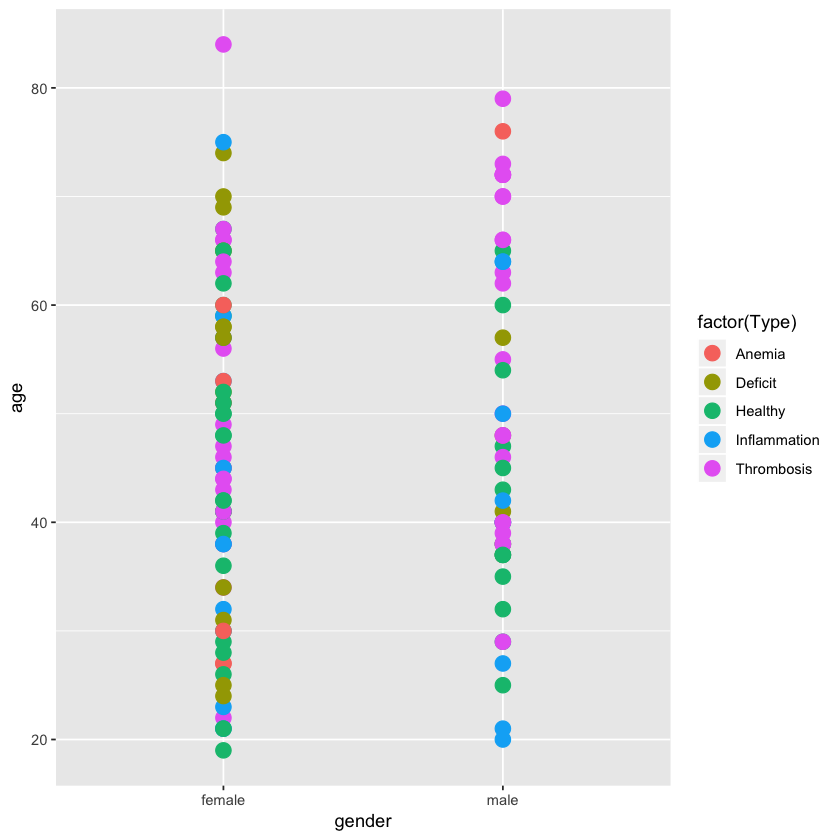

In [33]:
g <- ggplot(new_dt, aes(gender, age)) + 
    geom_point(aes(colour = factor(Type)), size = 4)
g

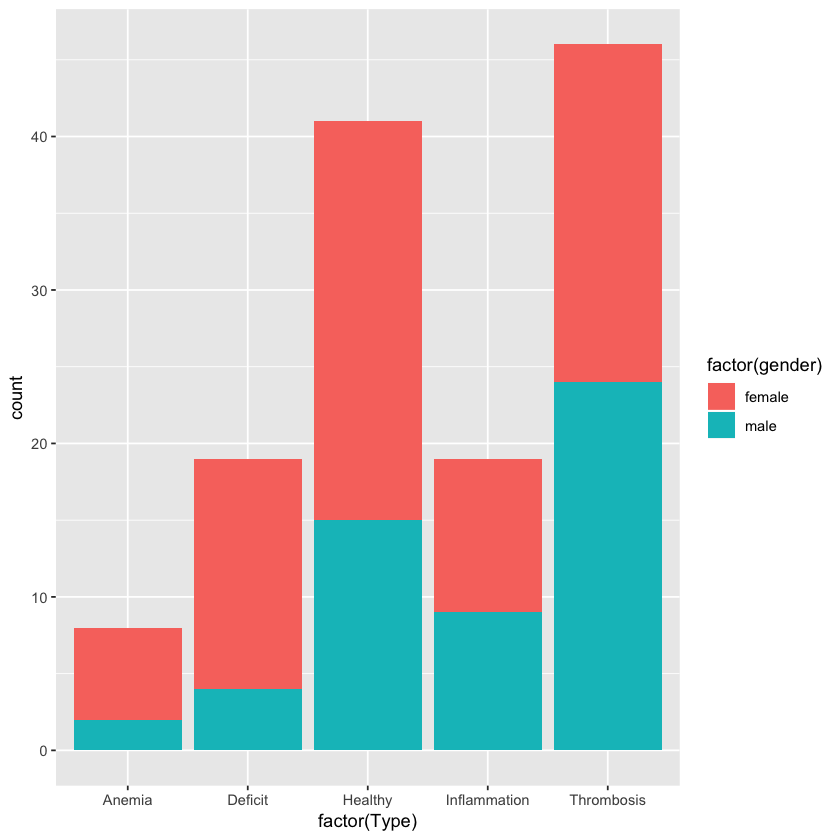

In [34]:
p <- ggplot(new_dt, aes(factor(Type)))+ 
    geom_bar(aes(fill = factor(gender)))
p

Построим корреляционные матрицы
----

In [41]:
# удалим факторные показатели 
drop_cols <- c('gender', 'Type')
cor_dt <- new_dt %>% select(-one_of(drop_cols))

In [42]:
str(cor_dt)

'data.frame':	133 obs. of  8 variables:
 $ age: int  38 29 43 34 19 50 45 32 63 38 ...
 $ WBC: num  67 56 58 52 57 56 38 3 59 29 ...
 $ RBC: num  18 18 35 45 25.5 ...
 $ HGB: int  111 127 148 171 122 163 169 134 167 121 ...
 $ HCT: num  4 20 21 29 14.8 ...
 $ PLT: num  48 38 3 12 18 21 46 84 65 23 ...
 $ LYM: num  15.4 13 17 23 11 ...
 $ MCV: num  5 18 18 18 25 ...


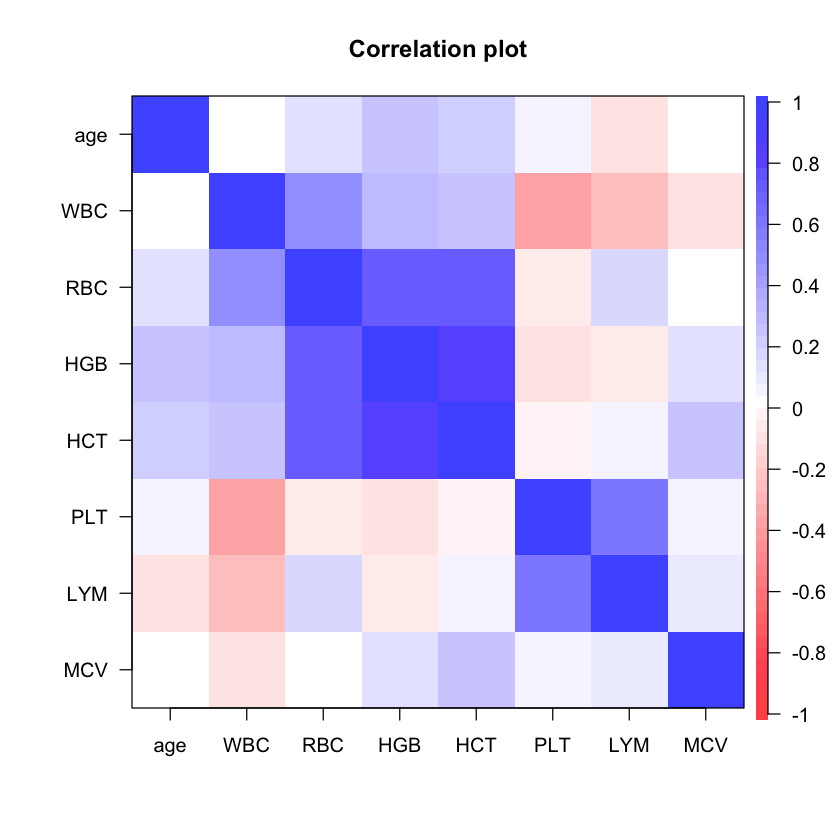

In [43]:
corPlot(cor_dt, cex = 1.2)

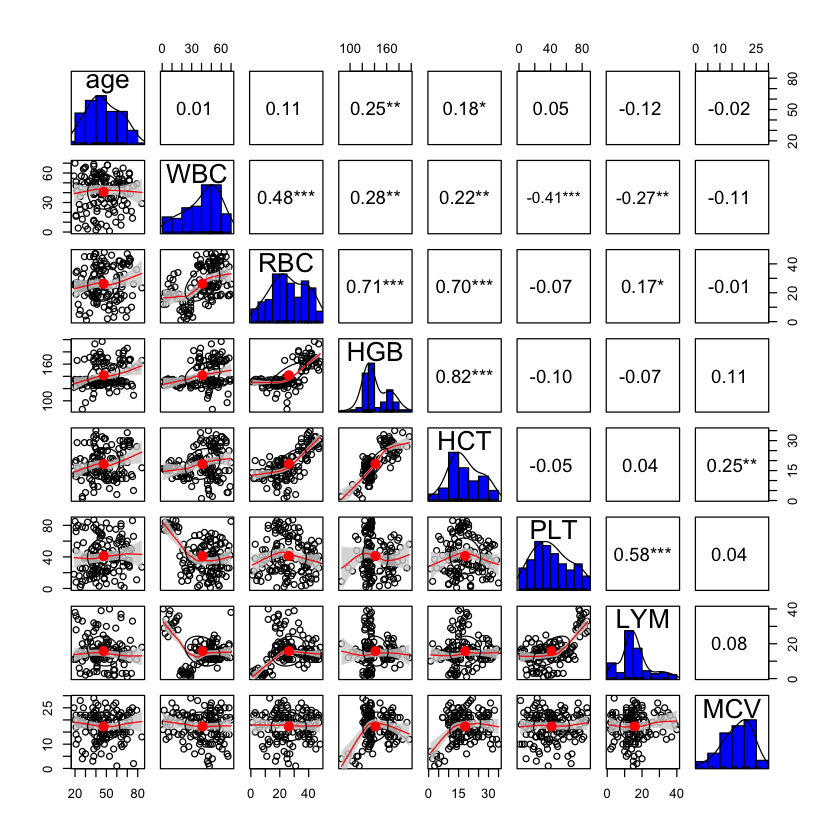

In [44]:
pairs.panels(cor_dt,
             smooth = TRUE,      
             scale = FALSE,      
             density = TRUE,     
             ellipses = TRUE,    
             method = "pearson", 
             pch = 21,           
             lm = FALSE,         
             cor = TRUE,         
             jiggle = FALSE,     
             factor = 2,         
             hist.col = 4,       
             stars = TRUE,      
             ci = TRUE) 

In [ ]:
# надо включить питон ядро 
%%writefile Обработка_пропущенных.R
install.packages("dplyr")
install.packages("caret")
install.packages("psych")
install.packages("ggplot2")

dt <- read.csv("Вар8.csv", header=T, na.strings=c("","NA"), sep=';')
head(dt)
str(dt)

name_na <- colnames(dt)[ apply(dt, 2, anyNA) ]
name_na

ind <- apply(dt, 1, function(x) sum(is.na(x))) > 0

dt[ind, name_na]

str(dt[name_na])

library("dplyr")

# функция на нахождения моды 
Mode <- function(x) {
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
}

mean_dt <- dt[, name_na] %>% mutate_if(is.numeric, funs(replace(.,is.na(.), mean(., na.rm = TRUE)))) %>%
  mutate_if(is.factor, funs(replace(.,is.na(.), Mode(na.omit(.)))))
    
mean_dt[ind, name_na]

# так как зависимая переменная должна быть числом а не фактором 
# то преобразуем пропущенные факторные значения в числовые 
dt[, name_na] <- lapply(dt[, name_na], function(x) as.integer(factor(x)))

dt$WBC <- as.numeric(dt$WBC)


fit <- lm(RBC ~ age + gender + Type , data = dt)
fit


library("caret")
pBag <- preProcess(dt[, name_na], method = 'bagImpute')
dt[, name_na] <- predict(pBag, dt[, name_na])
bag_dt <- dt[, name_na]
bag_dt[ind, name_na]

pKNN <- preProcess(dt[, name_na], method = 'knnImpute')
stand <- predict(pKNN, dt[, name_na])

stand[ind, name_na]

m <- pKNN$mean
sd <- pKNN$std
dt[, name_na] <- t(apply(stand, 1, function (r) m + r * sd))
knn_dt <- dt[, name_na]
knn_dt[ind, name_na]

# опишем все колонки кроме первой(так как там находится фамилии )
new_dt <- dt[-1]
summary(new_dt)

library("psych")
# или опишем другим способом 
psych::describe(new_dt)
        
# можем описать данные сгруппировав их по полу 
describeBy(new_dt, new_dt$gender)

# или можем сгруппировать их по типу болезни 
describeBy(new_dt, new_dt$Type)

library("ggplot2")
library("dplyr")
# так же можешь сгруппировать по трем признакам, по полу, возрасту и типу болезни. 
# Для примера сделаем просто подсчет   
by_age_gender_type <- new_dt %>% group_by(gender, Type, age)
by_gender <- by_age_gender_type %>% summarise(n = n(), .groups = 'drop')
by_gender

g <- ggplot(new_dt, aes(gender, age)) + 
    geom_point(aes(colour = factor(Type)), size = 4)
g

p <- ggplot(new_dt, aes(factor(Type)))+ 
    geom_bar(aes(fill = factor(gender)))
p


# удалим факторные показатели 
drop_cols <- c('gender', 'Type')
cor_dt <- new_dt %>% select(-one_of(drop_cols))

corPlot(cor_dt, cex = 1.2)

pairs.panels(cor_dt,
             smooth = TRUE,      
             scale = FALSE,      
             density = TRUE,     
             ellipses = TRUE,    
             method = "pearson", 
             pch = 21,           
             lm = FALSE,         
             cor = TRUE,         
             jiggle = FALSE,     
             factor = 2,         
             hist.col = 4,       
             stars = TRUE,      
             ci = TRUE) 